In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#GOOGLE TREND EXTRAPOLATION TO A DATAFRAME WITH ANONYMOUS COLUMN LABEL

def load_trend(trend_name='football', country_code='us'):
    df = pd.read_csv('data/google-trends_'
                     + trend_name + '_'
                     + country_code
                     + '.csv').iloc[1:, :]
    df.columns = ['values']
    df['values'] = df['values'].str.replace('<1', '0').astype(int)
    return df

In [3]:
trends = [
    {'trend_name': 'data-science', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'uk'},
    {'trend_name': 'game-of-thrones', 'country_code': 'us'},
    {'trend_name': 'pokemon', 'country_code': 'us'},
    {'trend_name': 'taxes', 'country_code': 'us'},   
]

In [20]:
trend_dfs = [load_trend(**trend) for trend in trends]
#

In [79]:
#load specific trend
load_trend(trend_name = 'football', country_code='uk')

,values
2004-01,57
2004-02,57
2004-03,58
2004-04,57
2004-05,61
2004-06,72
2004-07,53
2004-08,64
2004-09,63
2004-10,63


In [21]:
#np.random.shuffle(trend_dfs)

In [22]:
trend_dfs[3]

,values
2004-01,0
2004-02,0
2004-03,0
2004-04,0
2004-05,0
2004-06,0
2004-07,0
2004-08,0
2004-09,0
2004-10,0


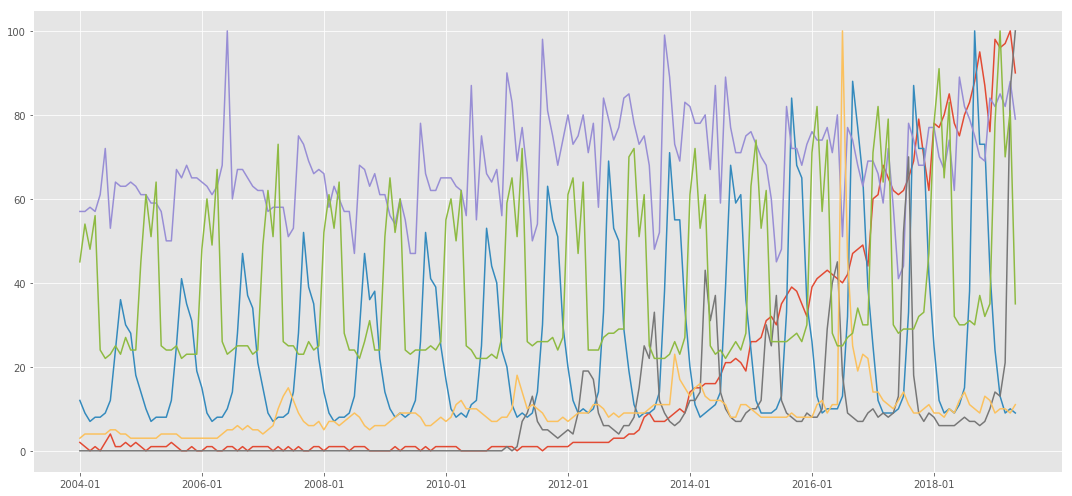

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
for i in range(len(trend_dfs)): #enumerate gets you which set of axes you're working with
    ax.plot(trend_dfs[i].index, 
            trend_dfs[i].values)
plt.tight_layout()
ticks = ax.get_xticks()
ax.set_xticks([tick for tick in ticks if tick%24 == 0])

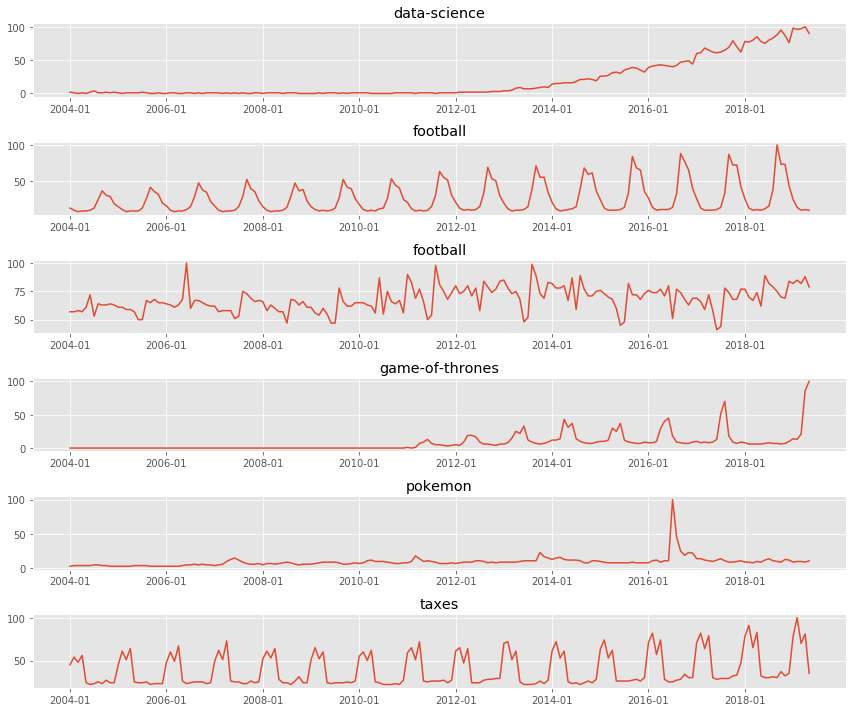

In [29]:
import matplotlib; matplotlib.style.use('ggplot')
fig, axs = plt.subplots(len(trend_dfs),1,figsize=(12,10))

for i,trend_df in enumerate(trend_dfs): #enumerate gets you which set of axes you're working with
    ax = axs[i]
    ax.plot(trend_df.index, 
            trend_df.values)
    ticks = ax.get_xticks()
    ax.set_xticks([tick for tick in ticks if tick%24 == 0])
    ax.set_title(str(trends[i]['trend_name']))
plt.tight_layout()



In [ ]:
Yi = Ti + Si + Ri #time trend + seasonal trend + residuals (minimize)

In [30]:
taxes_df = trend_dfs[-1]

In [31]:
taxes_df.head()

,values
2004-01,45
2004-02,54
2004-03,48
2004-04,56
2004-05,24


In [35]:
taxes_df['i'] = np.arange(len(taxes_df)) #global pattern
taxes_df['month'] = taxes_df['i'] % 12

In [38]:
taxes_df.head()

,values,i,month
2004-01,45,0,0
2004-02,54,1,1
2004-03,48,2,2
2004-04,56,3,3
2004-05,24,4,4


In [39]:
from sklearn.linear_model import LinearRegression

In [44]:
X = taxes_df[['i']] #this needs to be 2-dimensional, a DF with 1 column instead of a series
y = taxes_df['values']

lr = LinearRegression()

In [45]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
trend_line = lr.predict(X)

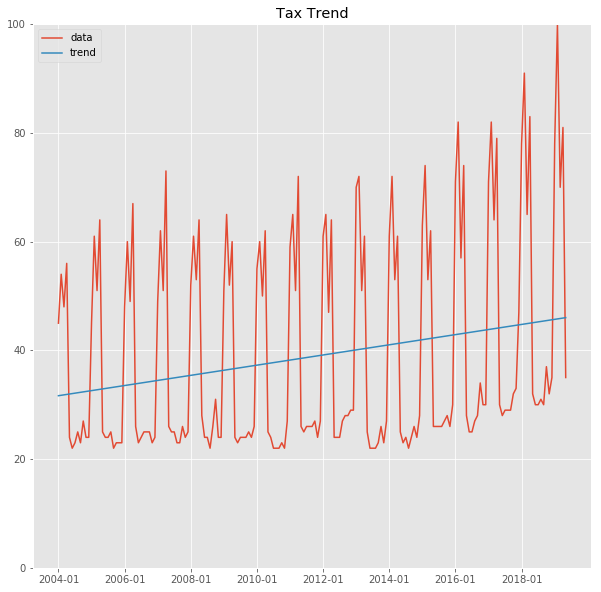

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
 
ax.set_title('Tax Trend')
ax.plot(trend_df.index, 
        trend_df['values'],label='data')
ax.plot(trend_df.index,
        trend_line,label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0,100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])

plt.show()

In [57]:
season_model = LinearRegression()
season_model.fit(taxes_df[['month']],taxes_df['values']-trend_line)
season_pred = season_model.predict(taxes_df[['month']])

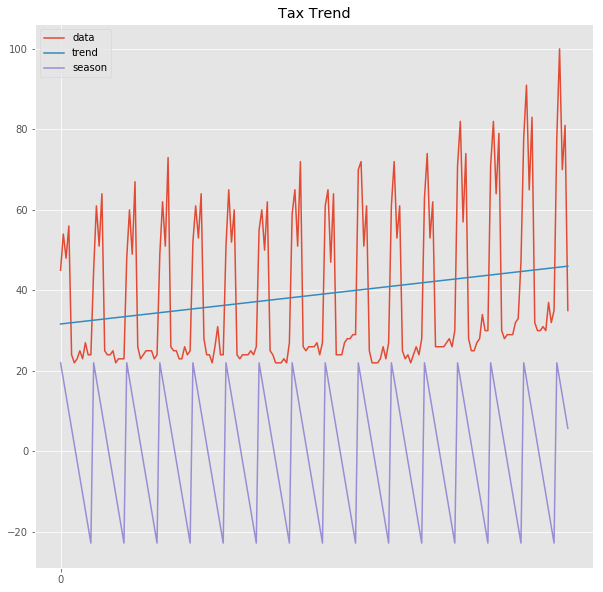

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
 
ax.set_title('Tax Trend')
ax.plot(trend_df['i'], 
        trend_df['values'],label='data')
ax.plot(trend_df['i'],
        trend_line,label='trend')
ax.plot(trend_df['i'], season_pred, label='season')
plt.legend()
ticks = ax.get_xticks()
#ax.set_ylim((0,100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])

plt.show()

In [64]:
from sklearn.preprocessing import OneHotEncoder

month_encoder = OneHotEncoder(categories='auto')

In [65]:
month_encoder.fit(taxes_df[['month']])

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [70]:
month_data = month_encoder.transform(taxes_df[['month']]).toarray()

In [71]:
lr = LinearRegression()
data = np.hstack((taxes_df[['i']].values, month_data))
lr.fit(data,taxes_df['values'])
lr_pred = lr.predict(data)


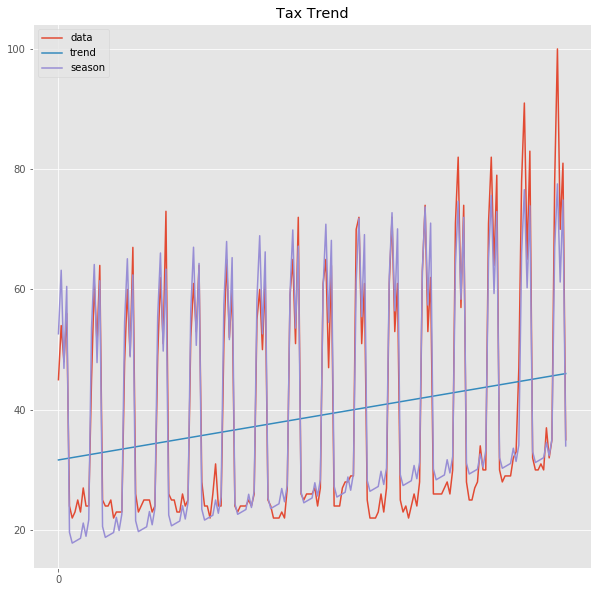

In [73]:
fig, ax = plt.subplots(figsize=(10,10))
 
ax.set_title('Tax Trend')
ax.plot(trend_df['i'], 
        trend_df['values'],label='data')
ax.plot(trend_df['i'],
        trend_line,label='trend')
ax.plot(trend_df['i'], lr_pred, label='season')
plt.legend()
ticks = ax.get_xticks()
#ax.set_ylim((0,100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])

plt.show()

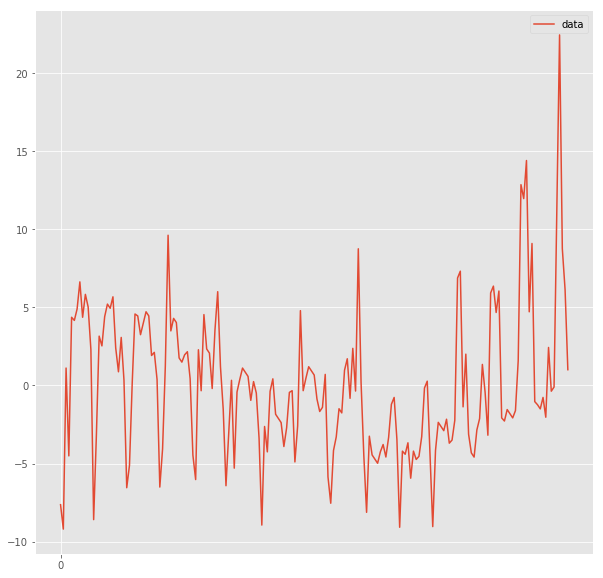

In [76]:
fig, ax = plt.subplots(figsize=(10,10))
 
#ax.set_title('Tax Trend')
ax.plot(trend_df['i'], 
        trend_df['values'] - lr_pred,label='data') #RESIDUALS OF RED-PURPLE (ACTUAL - PREDICTION)
#ax.plot(trend_df['i'],
#        trend_line,label='trend')
#ax.plot(trend_df['i'], lr_pred, label='season')
plt.legend()
ticks = ax.get_xticks()
#ax.set_ylim((0,100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])

plt.show()